# Objective :> Objective is to make a machine learning model and implement it on the heart dataset to predict whether a person has a heart disease or not using various features given in the dataset we will also use different algorithms to check which model best fits and gives us a better accuracy. 

In [74]:
#age = age in years
#sex =(1 = male; 0 = female)
#cp =chest pain type
#trestbps =resting blood pressure (in mm Hg on admission to the hospital)
#cholserum =cholestoral in mg/dl
#fbs =(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecgresting = electrocardiographic results
#thalach =maximum heart rate achieved
#exang =exercise induced angina (1 = yes; 0 = no)
#oldpeak =ST depression induced by exercise relative to rest
#slope =the slope of the peak exercise ST segment
#ca =number of major vessels (0-3) colored by flourosopy
#thal =3 = normal; 6 = fixed defect; 7 = reversable defect
# target1 or 0

# Importing libraries

In [75]:
#importing the libraries in the python which will be used to make operation on the dataset

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [77]:
#importing the dataset using pandas 

In [78]:
df = pd.read_csv('heart.csv')

In [79]:
#checking the data and getting the information of the data

In [80]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [83]:
df.shape

(1025, 14)

In [84]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [85]:
#checking for the null values in the dataset

In [86]:
df.isnull().sum()  #no null values present in the data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [87]:
#average male who got heart disease

In [88]:
df[(df.target ==  1) & (df.sex == 1)].age.mean() #average male getting the disease was 50.73666

50.736666666666665

In [89]:
#average female who got heart disease 

In [90]:
df[(df.target ==  1) & (df.sex == 0)].age.mean() #average female getting the disease is 54.62831

54.6283185840708

In [91]:
#checking the target data using countplot is balanced or not so that it gives us the best prediction

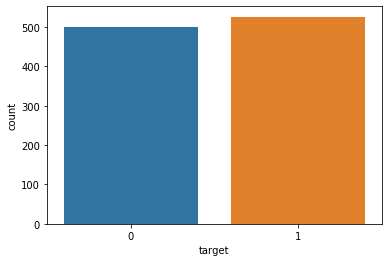

In [92]:
sns.countplot(x ='target',data =df) #target data is evenly distributed

In [93]:
df.target.value_counts()   #amongst 1025 entries 526 has disease and 499 doesn't

1    526
0    499
Name: target, dtype: int64

In [94]:
#checking heart disease frequency according to sex

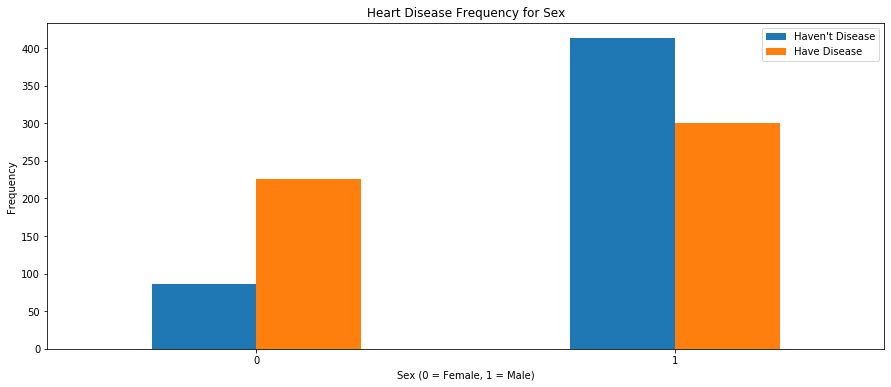

In [95]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [96]:
#checking the correlation between the features so that highly correlated elements can be dropped for a better accuracy

In [97]:
corr_ = df.corr()

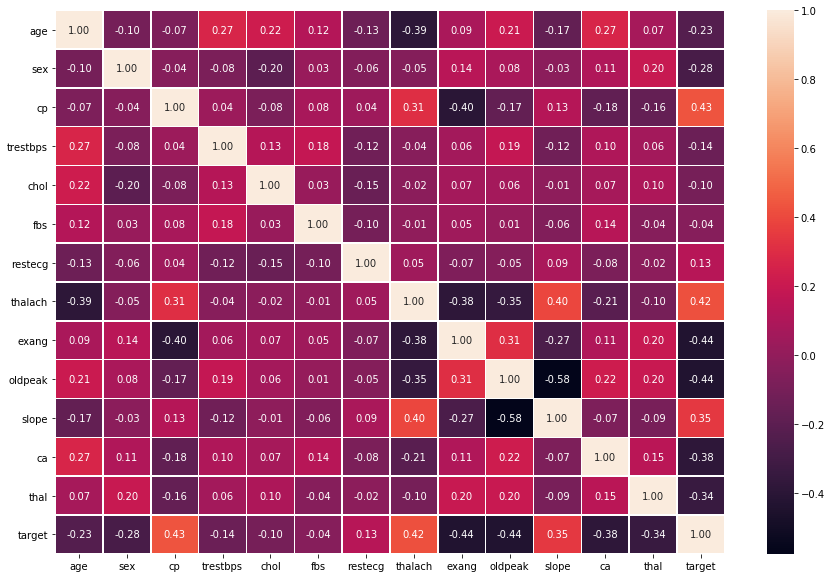

In [98]:
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_,annot=True,linewidths=0.5,fmt=".2f")# we can see that chest pain is the most positively correlated

In [99]:
#checking the outliers in the data if any

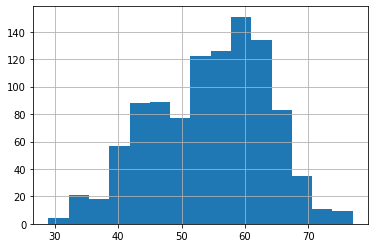

In [100]:
df.age.hist(bins= 15) #gives a bellshaped curve so not to drop any column or a row as the data has no outliers

In [101]:
# violinplot for checking the age density which mostly falls btw 55-65

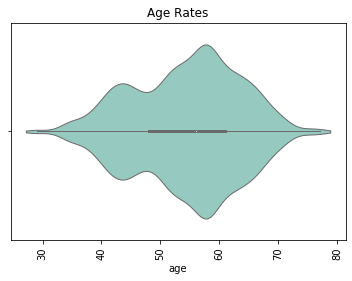

In [102]:
sns.violinplot(df.age, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("Age Rates")
plt.show()  

In [103]:
#analysis of the feature chestpain as it its the most obvious criteria for the heart disease

In [104]:
df.cp.value_counts().unique()

array([497, 284, 167,  77], dtype=int64)

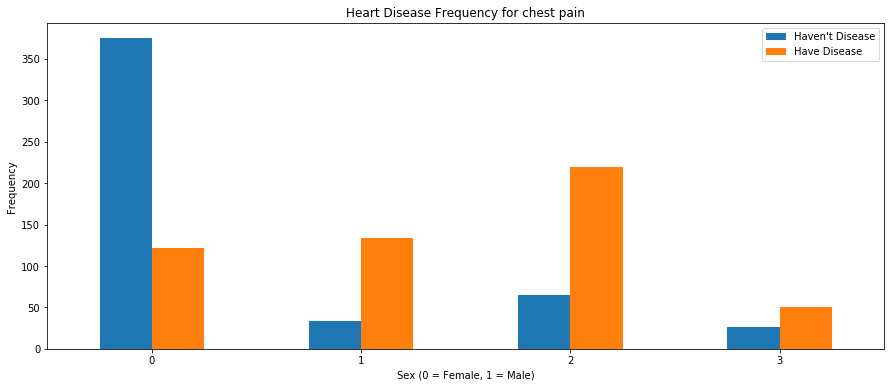

In [31]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for chest pain')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [32]:
#checking duplicate data if any

In [33]:
df[df.duplicated()==True] #723 rows has some or the other duplicates so we cant drop the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [34]:
#scatterplots for the features used to see the correlation between the different features

In [35]:
def scatterplot(var1,var2,var3,var4):
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    ax1 = sns.scatterplot(x = df[var1], y = df[var2], hue = "target",data =df,ax=ax1)
    ax2 = sns.scatterplot(x = df[var3], y = df[var4], hue = "target",data =df,ax=ax2)

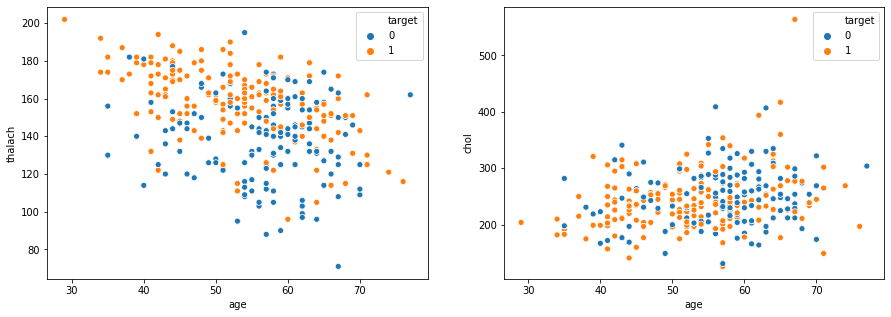

In [36]:
scatterplot('age','thalach','age', 'chol') #shows that maximum heart rate achieved has more heart disease

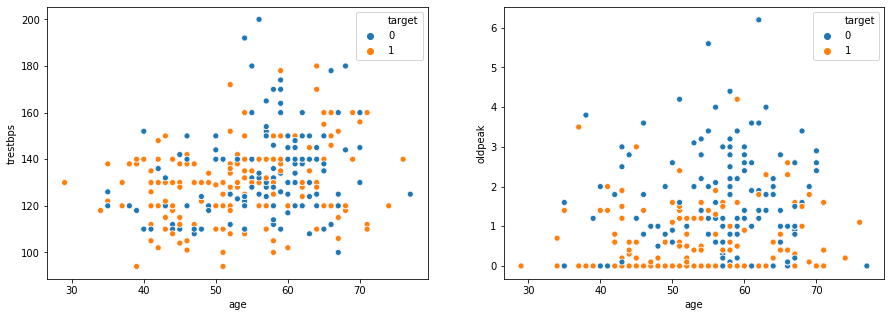

In [37]:
scatterplot('age','trestbps','age', 'oldpeak')

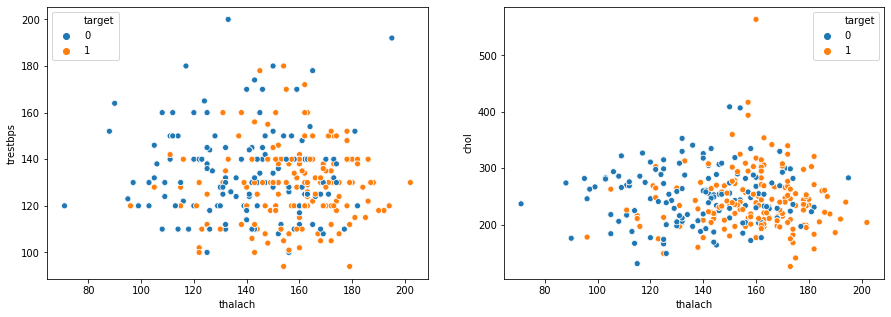

In [38]:
scatterplot('thalach','trestbps','thalach', 'chol')

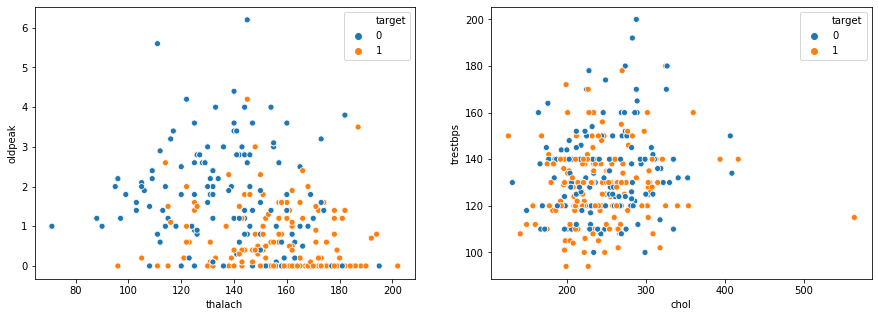

In [39]:
scatterplot('thalach','oldpeak','chol', 'trestbps') #chol and thalach are very much correlated

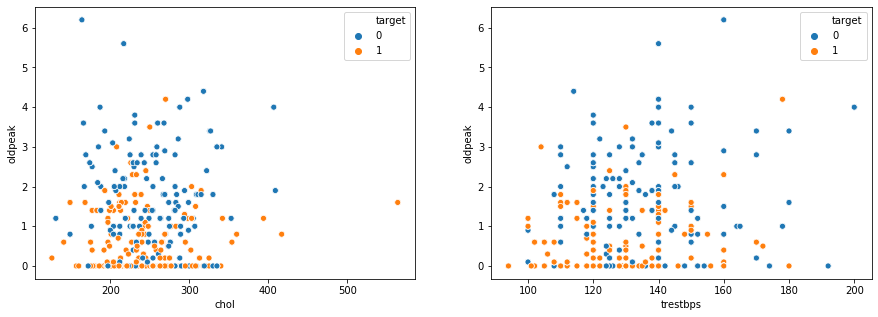

In [40]:
scatterplot('chol','oldpeak','trestbps', 'oldpeak')

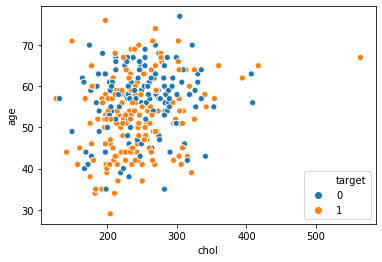

In [41]:
sns.scatterplot(df.chol,df.age,hue = df.target,size_order =True) #people above 50 yrs of age have had more heart diseases

(array([  4.,  21.,  39.,  87., 127., 180., 255., 212.,  83.,  17.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <a list of 10 Patch objects>)

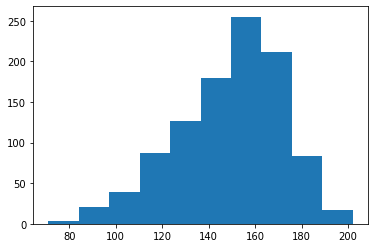

In [42]:
plt.hist(x =df.thalach)  

# Making machine learning model

In [43]:
#splitting the train and test data : data_label= target feature(dependent features) , data_scaled = other features(independent features)

In [44]:
data_label=df['target']
del df['target']
data_label=pd.DataFrame(data_label)

In [ ]:
#standard scaling for converting the data into a same scale

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled=MinMaxScaler().fit_transform(df)
data_scaled=pd.DataFrame(data=data_scaled, columns=df.columns)

In [46]:
data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


In [47]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data_scaled, data_label, test_size=0.3)

In [48]:
#applying the algorithm : K-nearest neighbours

In [115]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(algorithm='auto',n_neighbors= 19)
k.fit(Xtrain,Ytrain)
k.predict(Xtest)

C:\Users\NILAY JAILWAL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [116]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Ytest,k.predict(Xtest))
print("The accuracy of the model is" , acc)

The accuracy of the model is 0.8668831168831169


In [51]:
#applying algorithm naive-bayes

In [117]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(priors=None, var_smoothing=1e-09)
nb.fit(Xtrain,Ytrain)
nb.predict(Xtest)

C:\Users\NILAY JAILWAL\anaconda3\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [118]:
ac = accuracy_score(Ytest,nb.predict(Xtest))

In [119]:
print("The accuracy of the naive bayes model is", ac)

The accuracy of the naive bayes model is 0.827922077922078


In [55]:
#applying the decision tree algorithm

In [120]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(Xtrain,Ytrain)
dct.predict(Xtest)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [121]:
accuracy = accuracy_score(Ytest,dct.predict(Xtest))
print("The accuracy of the decision tree model is", accuracy)

The accuracy of the decision tree model is 0.9707792207792207


## hence we can see that the decision tree algorithm is predicting very accurately so we can use this algorithm to predict the data we can alter the test dataset with for the values of the features we want to predict if a person is having the disease or not and can see the results in the target column.

In [122]:
#as the data is big the decision tree with 14 features would be too so vizualizing the decision tree 

In [123]:
from sklearn import tree

In [124]:
clf = tree.DecisionTreeClassifier(random_state=0)

In [125]:
clf = clf.fit(data_scaled, data_label)

[Text(412.4639423076923, 516.4200000000001, 'X[2] <= 0.167\ngini = 0.5\nsamples = 1025\nvalue = [499, 526]'),
 Text(229.37019230769232, 462.06000000000006, 'X[11] <= 0.125\ngini = 0.37\nsamples = 497\nvalue = [375, 122]'),
 Text(144.8653846153846, 407.70000000000005, 'X[12] <= 0.833\ngini = 0.5\nsamples = 219\nvalue = [112, 107]'),
 Text(80.48076923076923, 353.34000000000003, 'X[8] <= 0.5\ngini = 0.389\nsamples = 125\nvalue = [33, 92]'),
 Text(32.19230769230769, 298.98, 'X[7] <= 0.195\ngini = 0.182\nsamples = 79\nvalue = [8, 71]'),
 Text(16.096153846153847, 244.62, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(48.28846153846154, 244.62, 'X[4] <= 0.435\ngini = 0.101\nsamples = 75\nvalue = [4, 71]'),
 Text(32.19230769230769, 190.26000000000005, 'gini = 0.0\nsamples = 68\nvalue = [0, 68]'),
 Text(64.38461538461539, 190.26000000000005, 'X[0] <= 0.677\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(48.28846153846154, 135.90000000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Te

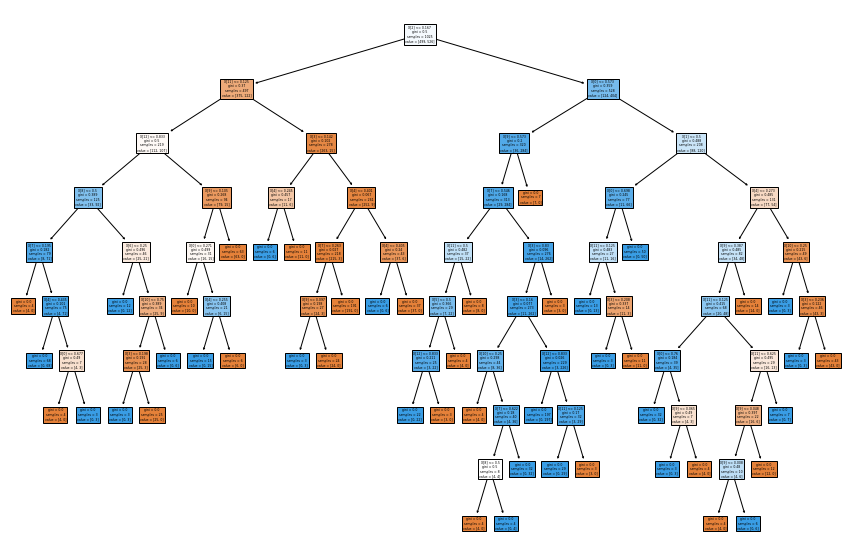

In [126]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled = True)

# Using pycaret library for achieving best predictions

In [129]:
from pycaret.classification import *
clf1 = setup(data =df, target = 'target')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6497
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1025, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [130]:
compare_models() #we can see that the random forest classifier performs the best for this dataset

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.976300,0.995800,0.983700,0.971300,0.977000,0.952500
1,Extra Trees Classifier,0.976300,0.999100,0.989200,0.966600,0.977200,0.952500
2,Light Gradient Boosting Machine,0.970700,0.996300,0.983800,0.962000,0.972000,0.941300
3,CatBoost Classifier,0.969300,0.998100,0.981100,0.961900,0.970600,0.938500
4,Decision Tree Classifier,0.963800,0.963700,0.967400,0.963000,0.964500,0.927500
5,Gradient Boosting Classifier,0.947000,0.985200,0.959400,0.940500,0.948800,0.893900
6,Extreme Gradient Boosting,0.924600,0.981800,0.932100,0.924500,0.927100,0.849100
7,Ada Boost Classifier,0.878600,0.956600,0.875100,0.889100,0.880600,0.757200
8,Logistic Regression,0.866000,0.928100,0.880300,0.866000,0.870500,0.731600
9,Linear Discriminant Analysis,0.861800,0.934800,0.888600,0.853100,0.868600,0.723000


In [ ]:
#applying the random forest for prediction using pycaret library

In [131]:
rnfor = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9722,0.9961,1.0000,0.9487,0.9737,0.9443
1,0.9861,0.9950,1.0000,0.9737,0.9867,0.9722
2,0.9722,0.9934,0.9730,0.9730,0.9730,0.9444
3,0.9583,1.0000,0.9189,1.0000,0.9577,0.9168
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9861,0.9927,1.0000,0.9737,0.9867,0.9722
6,0.9861,0.9981,0.9730,1.0000,0.9863,0.9722
7,0.9859,0.9984,1.0000,0.9730,0.9863,0.9718
8,0.9296,0.9841,0.9722,0.8974,0.9333,0.8590
9,0.9859,1.0000,1.0000,0.9737,0.9867,0.9717


In [132]:
cb_final = finalize_model(rnfor)
cb_final

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=6497,
                       verbose=0, warm_start=False)

In [133]:
predictions = predict_model(cb_final , data = df)
predictions

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Label,Score
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0,0.1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0,0.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0,0.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0,0.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,1,1.0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0,0.0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,0,0.0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,1,1.0


In [ ]:
#hence we got the best performing model for this dataset and predictions with 97% accuracy throught pycaret library.